In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def plot_splits(samples, train_idx):
    samples["Split type"] = np.where(samples["Sample_ID"].isin(train_idx), "Train", "Test")
    samples["Split type"] = pd.Categorical(samples["Split type"], ["Test", "Train"])
    samples.sort_values("Split type", inplace=True)
    sns.histplot(x=samples["Pam50 Subtype"], hue=samples["Split type"], multiple = "fill")
    plt.title("Proportions of MoGCN train-test splits for each class")

## Train - Test split

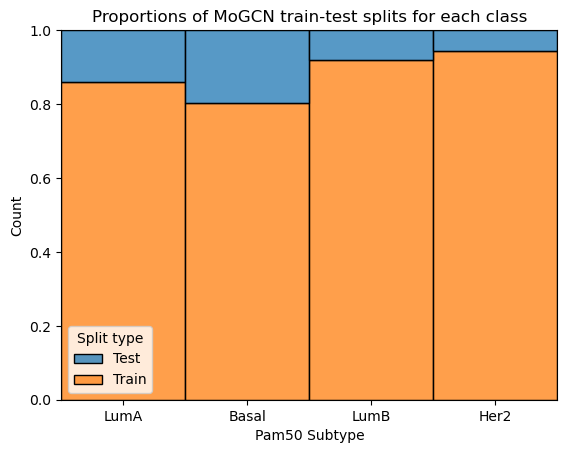

In [3]:
samples = pd.read_csv("./data/MoGCN_data/original/sample_classes.csv")
samples.rename(columns={"PAM50Call_RNAseq":"Pam50 Subtype"}, inplace=True)
samples.to_csv("./data/MoGCN_data/sample_classes.csv", index=False)

train_samples = pd.read_csv("./data/MoGCN_data/train_sample.csv")

plot_splits(samples, train_samples["Sample_ID"])

In [21]:
from sklearn.model_selection import train_test_split

test_size = 0.15
# test_path = "./data/MoGCN_data/test_sample_stratified.csv"
test_path = None
# train_path = "./data/MoGCN_data/train_sample_stratified.csv"
train_path = None

x, x_test = train_test_split(samples["Sample_ID"],test_size=test_size, stratify=samples["Pam50 Subtype"]) 

x.to_csv(train_path, index=False)
x_test.to_csv(test_path, index=False)

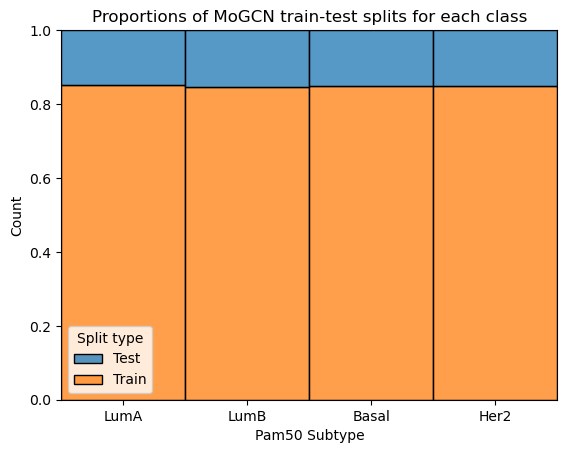

In [31]:
plot_splits(samples, x)

## Survival Data

In [3]:
surv_data = pd.read_csv("./data/MoGCN_data/TCGA-BRCA.survival.tsv", sep="\t")
surv_data.rename(columns={"OS":"Status", "_PATIENT":"Sample_ID","OS.time":"Survival_in_days"}, inplace=True)
surv_data["Sample_ID"] = surv_data["Sample_ID"].str.replace("TCGA-","")
surv_data.drop(["sample"], axis=1, inplace=True)
# surv_data["Sample_ID"] = surv_data["Sample_ID"].astype(str)
surv_data["Status"] = surv_data["Status"].astype(bool)
surv_data

,Status,Sample_ID,Survival_in_days
0,False,C8-A275,1
1,True,BH-A1F8,1
2,True,BH-A1F8,1
3,False,AC-A7VC,1
4,False,AN-A0AM,5
...,...,...,...
1255,False,B6-A0RE,7777
1256,False,B6-A0RN,8008
1257,False,B6-A0IA,8391
1258,False,B6-A0I5,8556


In [4]:
samples = pd.read_csv("./data/MoGCN_data/sample_classes.csv")
samples

,Sample_ID,class,Pam50 Subtype
0,A1-A0SF,0,LumA
1,A1-A0SJ,0,LumA
2,A1-A0SK,2,Basal
3,A1-A0SO,2,Basal
4,A1-A0SQ,0,LumA
...,...,...,...
506,GM-A2DM,0,LumA
507,GM-A2DN,0,LumA
508,GM-A2DO,1,LumB
509,GM-A3NY,0,LumA


In [5]:
data = pd.merge(samples, surv_data, on="Sample_ID", how="inner")
data = data.drop_duplicates(["Sample_ID"])
data.reset_index(drop=True, inplace=True)
data

,Sample_ID,class,Pam50 Subtypes,Status,Survival_in_days
0,A1-A0SF,0,LumA,False,1463
1,A1-A0SJ,0,LumA,False,416
2,A1-A0SK,2,Basal,True,967
3,A1-A0SO,2,Basal,False,852
4,A1-A0SQ,0,LumA,False,554
...,...,...,...,...,...
498,GM-A2DM,0,LumA,False,3226
499,GM-A2DN,0,LumA,False,3091
500,GM-A2DO,1,LumB,False,2596
501,GM-A3NY,0,LumA,False,1162


In [6]:
data.to_csv("./data/MoGCN_data/gt_data.csv", index=False)